In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
marathon = pd.read_csv("./data/marathon_results_2017.csv", 
                        usecols=["Age","M/F","Country","40K"])
 
marathon['40K'] = marathon['40K'].replace('-',0)
marathon['40K'] = marathon['40K'].apply(pd.to_timedelta)
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
marathon.head()

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,0 days 02:02:53,7373.0
1,30,M,USA,0 days 02:03:14,7394.0
2,25,M,JPN,0 days 02:03:38,7418.0
3,32,M,USA,0 days 02:04:35,7475.0
4,31,M,KEN,0 days 02:05:00,7500.0


<Axes: xlabel='Age', ylabel='TimeSeconds'>

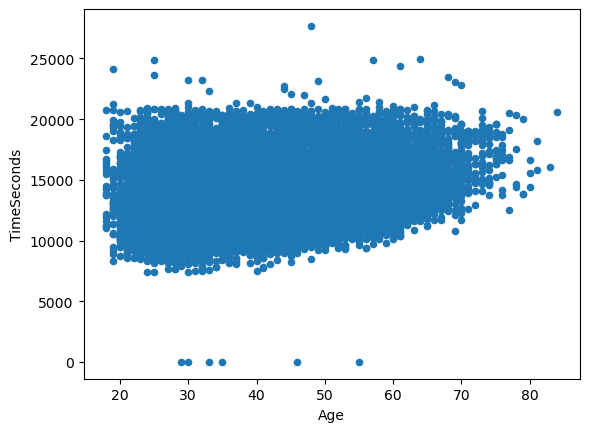

In [5]:
marathon.plot(kind='scatter',y='TimeSeconds',x='Age')

In [8]:
marathon_m = marathon[marathon['M/F'] == 'M']
marathon_f = marathon[marathon['M/F'] == 'F']

In [7]:
marathon_m

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,0 days 02:02:53,7373.0
1,30,M,USA,0 days 02:03:14,7394.0
2,25,M,JPN,0 days 02:03:38,7418.0
3,32,M,USA,0 days 02:04:35,7475.0
4,31,M,KEN,0 days 02:05:00,7500.0
...,...,...,...,...,...
26403,25,M,USA,0 days 06:34:28,23668.0
26404,19,M,USA,0 days 06:42:51,24171.0
26406,25,M,USA,0 days 06:54:21,24861.0
26408,64,M,USA,0 days 06:56:08,24968.0


In [9]:
marathon_f

,Age,M/F,Country,40K,TimeSeconds
20,37,F,KEN,0 days 02:14:43,8083.0
23,27,F,BRN,0 days 02:15:42,8142.0
24,25,F,USA,0 days 02:15:54,8154.0
33,33,F,USA,0 days 02:17:25,8245.0
43,33,F,KEN,0 days 02:19:07,8347.0
...,...,...,...,...,...
26385,37,F,USA,0 days 05:55:05,21305.0
26396,44,F,USA,0 days 06:18:21,22701.0
26399,49,F,USA,0 days 06:25:56,23156.0
26405,61,F,USA,0 days 06:46:57,24417.0


<Axes: xlabel='Age', ylabel='TimeSeconds'>

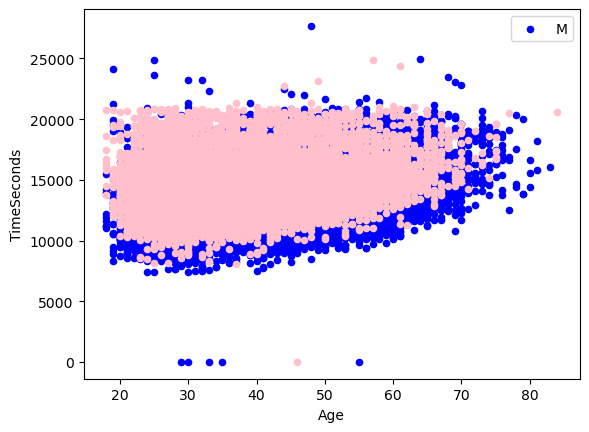

In [12]:
ax = marathon_m.plot.scatter(x="Age",y='TimeSeconds',color='Blue',label='M')
marathon_f.plot.scatter(x='Age',y='TimeSeconds',color='Pink',ax=ax)

<Axes: xlabel='Age', ylabel='TimeSeconds'>

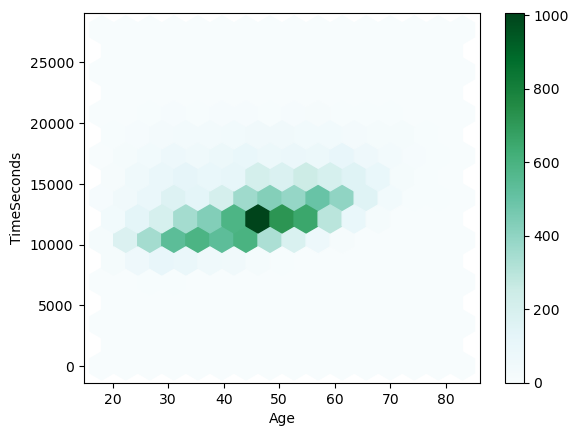

In [17]:
marathon_m.plot(kind='hexbin',x='Age',y='TimeSeconds',gridsize=15)

<Axes: xlabel='Age', ylabel='TimeSeconds'>

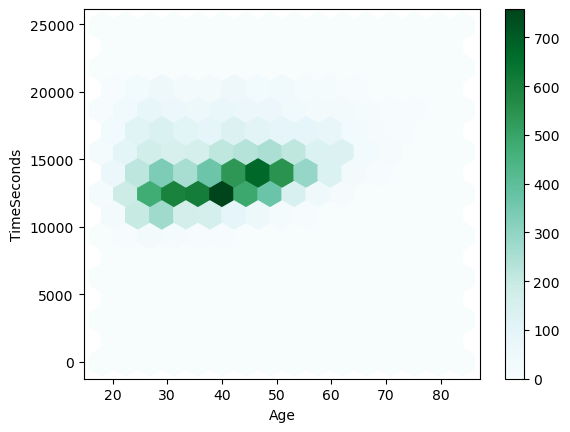

In [18]:
marathon_f.plot(kind='hexbin',x='Age',y='TimeSeconds',gridsize=15)

In [25]:
import datetime
    #Import data
nasa = pd.read_csv("./data/nasa_facebook_statuses.csv",
                usecols=["status_published","num_likes"])
    #Convert column type to date time
nasa["status_published"] = pd.to_datetime(nasa["status_published"])
    #Select observations between two datetimes - May 2015
filter_nasa =(nasa['status_published'] >= '2016-5-1') & (
    nasa['status_published'] < '2016-6-1') 
nasa = nasa[filter_nasa]
    #Add column with day only
nasa['day'] = nasa.apply(lambda row: row["status_published"].day,axis=1)
    #Group all columns by sum
nasa_by_day = nasa.groupby(by='day').sum(numeric_only=True)

In [26]:
    #import data
bean = pd.read_csv("./data/mrbean_facebook_statuses.csv",
                usecols=["status_published","num_likes"])
    #Convert column type to date time
bean["status_published"] = pd.to_datetime(bean["status_published"])

In [27]:
filter_bean = (bean['status_published'] >= '2016-5-1') & (bean['status_published'] < '2016-6-1')
bean=bean[filter_bean]

In [29]:
bean['day'] = bean.apply(lambda row: row["status_published"].day,axis=1)

In [31]:
bean_by_day = bean.groupby(by='day').sum(numeric_only=True)

In [34]:
days = pd.concat([nasa['day'],bean['day']])

In [40]:
days

137    31
138    31
139    31
140    31
141    31
       ..
16     12
17     11
18      8
19      6
20      4
Name: day, Length: 225, dtype: int64

In [35]:
days.head()

137    31
138    31
139    31
140    31
141    31
Name: day, dtype: int64

In [36]:
days.unique()

array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

In [37]:
fb = pd.DataFrame(index=days).sort_index()

In [38]:
fb['nasa'] = nasa_by_day["num_likes"]
fb['bean'] = bean_by_day["num_likes"]
fb.fillna(value=0,inplace=True)

In [39]:
fb.head()

,nasa,bean
day,,
1,60243,0.0
1,60243,0.0
1,60243,0.0
1,60243,0.0
2,177989,0.0
